### Step 1: Invoking Libraries & loading dataset

In [2]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loan = pd.read_csv("loan.csv") # Used initally: loan = pd.read_csv("loan.csv", low_memory = False)
loan.shape

(39717, 111)

In [3]:
pd.set_option("display.max_columns",300)   # Increase visibility by full Columns
pd.set_option("display.max_rows",115)      # Increase visibility by full Rows

### Step 2: Understanding & Cleaning up the Dataset 

    1. Fixing Rows - Check for header, footer, total, sub-total rows ==> No such rows found
    2. Fixing columns - check for missing header names, encoded columns ==> No such rows found
    3. Check for any duplicate records --> No Duplicate records found.
    4. Calculate the Percentage of Null Values in each column.
    5. Delete the columns whose % of null records is above 30%
    6. Analyze individual columns for Single values, 0 values, Invalid values, precision check & Incorrect data-types
    7. Invalid values, precision check & Incorrect data-types.

In [6]:
# 3. Check for any duplicate records --> No Duplicate records found.
loan = loan.drop_duplicates()
loan.shape

(39717, 111)

In [7]:
# 4. Calculate the Percentage of Null Values in each column.

round((loan.isnull().sum()*100 / loan.shape[0]).sort_values(ascending=False),1)

verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


In [8]:
 # 5. Delete the columns whose % of null records is above 30%, which can adversely impact the data analysis.
            # loan = loan.dropna(axis = 1,how = 'all') # Drops columns with all Null values
            # Note 1: next_payment_d (column 47) = The column which has got mixed records is also dropped as it has 97.1% Null Values.
            # Removed 58 columns with Null Values greater than 30%.

loan = loan.dropna(axis = 1, thresh= len(loan)*0.70)   # .70 --> Columns more than 30% Null values dropped
round((loan.isnull().sum()*100 / loan.shape[0]).sort_values(ascending=False),1)

loan.shape 

(39717, 53)

In [9]:
loan.info(verbose=1) # still there are columns with lesser number of null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
# 6. Analyzed individual columns for Single values, 0 values and dropped. Below is the observation.

loan["loan_amnt"].value_counts() # Sample syntax, applied for all the 55 columns to analyze.

    # DROP BELOW COLUMNS {12}
         # SINGLE VALUES    {4} ==> "pymnt_plan", "application_type", "policy_code", "initial_list_status"
         # Only 0.0 VALUES  {3} ==> "tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"
         # Only 0 VALUES    {2} ==> "delinq_amnt", "acc_now_delinq"
         # loan["url"]      {1} ==> holds only loan account number, no significant insight, can be dropped.
         # loan["emp_title"]{1} ==> holds 28820 unique values out of 39717, won't be of use in the EDA, can be dropped.
         # loan["sub_grade"]{1} ==> Will perform the EDA upto Grade Level, subgrade level will not bring additional insight, can be dropped.

loan = loan.drop(columns=["pymnt_plan", "application_type", "policy_code", "initial_list_status", "tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med", "delinq_amnt", "acc_now_delinq", "url","emp_title","sub_grade" ])
loan.shape

(39717, 41)

In [11]:
# 7. Invalid values, precision check & Incorrect data-types. 

# Standardizing & Precision - REMOVE "%" & CONVERT TO FLOAT {2} ==> "int_rate", "revol_util"

loan['int_rate'] = loan['int_rate'].str.replace('%', '').astype(float)
loan["revol_util"] = loan["revol_util"].str.replace('%', '').astype(float)

# Standardizing & Precision - REMOVE "months" & CONVERT TO INT {1} ==> "term"

loan["term"] = loan["term"].str.replace('months', '').astype('int64')

# Standardizing & Precision - Round_OFF To 2 DECIMAL PLACES {2} ==> "total_pymnt", "funded_amnt_inv"

loan["total_pymnt"] = round(loan["total_pymnt"],2)
loan["funded_amnt_inv"] = round(loan["funded_amnt_inv"],2)


In [12]:
# REMOVE ">" & "years" & CONVERT TO INT {1} ==> "emp_length"

loan['emp_length'] = loan['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
})

In [13]:
# Incorrect Datatypes - CHANGE TO DATE FORMAT {4} ==> "issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"

In [14]:
loan["issue_d"] = pd.to_datetime(loan["issue_d"],format="%b-%y")

In [15]:
loan["earliest_cr_line"] = pd.to_datetime(loan["earliest_cr_line"],format="%b-%y")

In [16]:
loan["last_pymnt_d"] = pd.to_datetime(loan["last_pymnt_d"],format="%b-%y")

In [17]:
loan["last_credit_pull_d"] = pd.to_datetime(loan["last_credit_pull_d"],format="%b-%y")

In [18]:
# Rechecking % of null values in the dataset

round((loan.isnull().sum()*100 / loan.shape[0]).sort_values(ascending=False),1).head(6)

emp_length              2.7
pub_rec_bankruptcies    1.8
last_pymnt_d            0.2
revol_util              0.1
title                   0.0
last_credit_pull_d      0.0
dtype: float64

### Step 3: Dropping & Imputing of remaining null values

In [20]:
# Storing record count to check what percentage of data records are dropped

Original_rec_count = loan.shape[0]
Original_rec_count

39717

In [21]:
# Anything less than 5 % of data records, can be dropped, as it will not impact the analysis much.

loan = loan[~loan["emp_length"].isnull()]            # Dropping null records for column "emp_length"
loan = loan[~loan["pub_rec_bankruptcies"].isnull()]  # Dropping null records for column "pub_rec_bankruptcies"

New_rec_count = loan.shape[0]
New_rec_count

37945

In [22]:
# Percentage of records dropped

print("Total % of rows deleted: ", round((((Original_rec_count - New_rec_count)/Original_rec_count)*100),2))

Total % of rows deleted:  4.46


In [23]:
loan["loan_status"].value_counts()

loan_status
Fully Paid     31566
Charged Off     5281
Current         1098
Name: count, dtype: int64

In [24]:
# Dropping records with Loan_status = "Current, irrelevant for the analysis as analysis, Fully Paid & charged Off will be only used for analysis.

loan = loan[loan["loan_status"] != "Current"]

In [25]:
# Rechecking Percentage of Null values in the data set

round((loan.isnull().sum()*100 / loan.shape[0]).sort_values(ascending=False),1).head(4)

last_pymnt_d          0.2
revol_util            0.1
title                 0.0
last_credit_pull_d    0.0
dtype: float64

In [26]:
# Only after dropping the Null values from "emp_length" column data-type change to INT initiated.

loan["emp_length"] = loan["emp_length"].astype('int64') 

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       36847 non-null  int64         
 1   member_id                36847 non-null  int64         
 2   loan_amnt                36847 non-null  int64         
 3   funded_amnt              36847 non-null  int64         
 4   funded_amnt_inv          36847 non-null  float64       
 5   term                     36847 non-null  int64         
 6   int_rate                 36847 non-null  float64       
 7   installment              36847 non-null  float64       
 8   grade                    36847 non-null  object        
 9   emp_length               36847 non-null  int64         
 10  home_ownership           36847 non-null  object        
 11  annual_inc               36847 non-null  float64       
 12  verification_status      36847 non-nu

### Step 4: Creating Derived Columns

In [29]:
# Creating 2 new Columns "issue_month" & "issue_year" from "issue_d"

loan["issue_month"] = pd.DatetimeIndex(loan["issue_d"]).month
loan["issue_year"] = pd.DatetimeIndex(loan["issue_d"]).year

loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,12,2011


### Step 5: Identifying & Analyzing Outlier with a BoxPlot

In [31]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
count,3.684700e+04,3.684700e+04,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,3.684700e+04,36847,36847.000000,36847.000000,36847,36847.000000,36847.000000,36847.000000,36847.000000,36800.000000,36847.000000,36847.0,36847.0,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36781,36847.000000,36846,36847.000000,36847.000000,36847.000000
mean,6.831532e+05,8.514790e+05,11141.327652,10872.924526,10430.400868,42.029473,11.988346,324.694599,4.961788,6.940448e+04,2010-11-10 16:10:29.196406784,13.330449,0.146172,1997-05-31 07:22:42.249301120,0.869759,9.296578,0.054170,13358.049095,48.992830,22.137623,0.0,0.0,11991.064274,11515.607570,9741.820229,2149.555295,1.339245,98.349578,12.617428,2013-03-24 18:40:22.446371584,2792.239098,2014-09-05 17:25:00.146555904,0.041794,7.156376,2010.348549
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,2007-08-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-05-01 00:00:00,0.000000,2007-08-01 00:00:00,0.000000,1.000000,2007.000000
25%,5.170210e+05,6.676035e+05,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.565000,2.000000,4.100400e+04,2010-05-01 00:00:00,8.210000,0.000000,1994-01-16 12:00:00,0.000000,6.000000,0.000000,3712.000000,25.600000,14.000000,0.0,0.0,5569.110000,5262.465000,4574.395000,656.920000,0.000000,0.000000,0.000000,2012-04-01 00:00:00,221.980000,2013-06-01 00:00:00,0.000000,4.000000,2010.000000
50%,6.596910e+05,8.432780e+05,10000.000000,9600.000000,9000.000000,36.000000,11.860000,280.000000,4.000000,6.000000e+04,2011-02-01 00:00:00,13.420000,0.000000,1998-07-01 00:00:00,1.000000,9.000000,0.000000,8858.000000,49.500000,20.000000,0.0,0.0,9810.740000,9343.830000,8000.000000,1325.070000,0.000000,0.000000,0.000000,2013-04-01 00:00:00,587.360000,2015-02-01 00:00:00,0.000000,7.000000,2011.000000
75%,8.309685e+05,1.039330e+06,15000.000000,15000.000000,14335.045000,60.000000,14.520000,428.975000,9.000000,8.300000e+04,2011-08-01 00:00:00,18.590000,0.000000,2001-10-01 00:00:00,1.000000,12.000000,0.000000,17009.500000,72.500000,29.000000,0.0,0.0,16293.860000,15610.160000,13499.990000,2715.355000,0.000000,0.000000,0.000000,2014-04-01 00:00:00,3536.650000,2016-04-01 00:00:00,0.000000,10.000000,2011.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2016-05-01 00:00:00,36115.200000,2016-05-01 00:00:00,2.000000,12.000000,2011.000000
std,2.014598e+05,2.530373e+05,7369.988994,7109.330771,7008.919434,10.409407,3.702091,208.886154,3.551783,6.402747e+04,NaN,6.651565,0.492100,NaN,1.067854,4.377256,0.235522,15846.594215,28.313209,11.410978,0.0,0.0,8854.070598,8710.114181,7039.568514,2410.728665,7.195812,703.476957,150.588213,NaN,4533.207098,NaN,0.200799,3.380512,0.816240


In [32]:
# Taking backup of cleaned dataset before performing the Univariate analysis.

loan_1 = loan
loan_1.shape

# Setting up Scheme of the Charts.

plt.style.use('seaborn-v0_8')


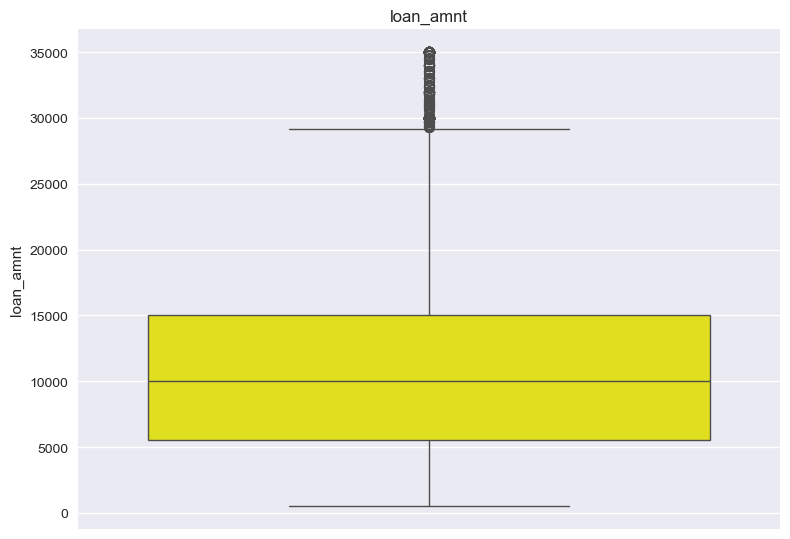

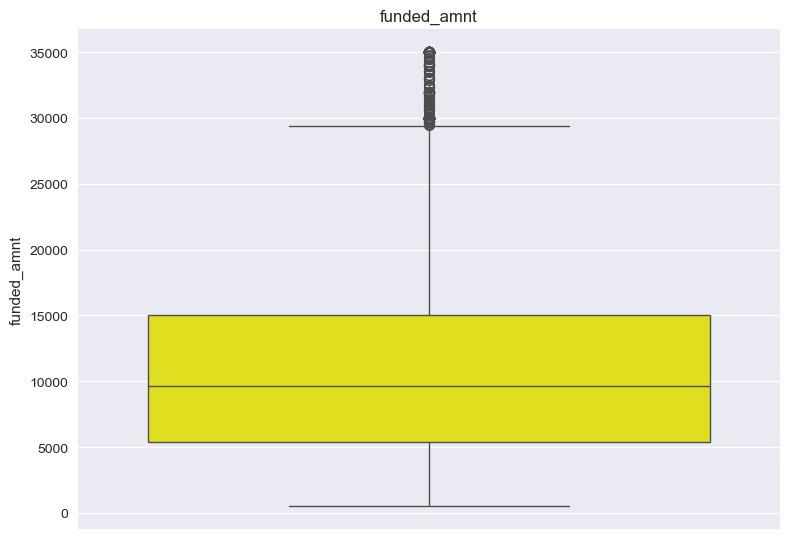

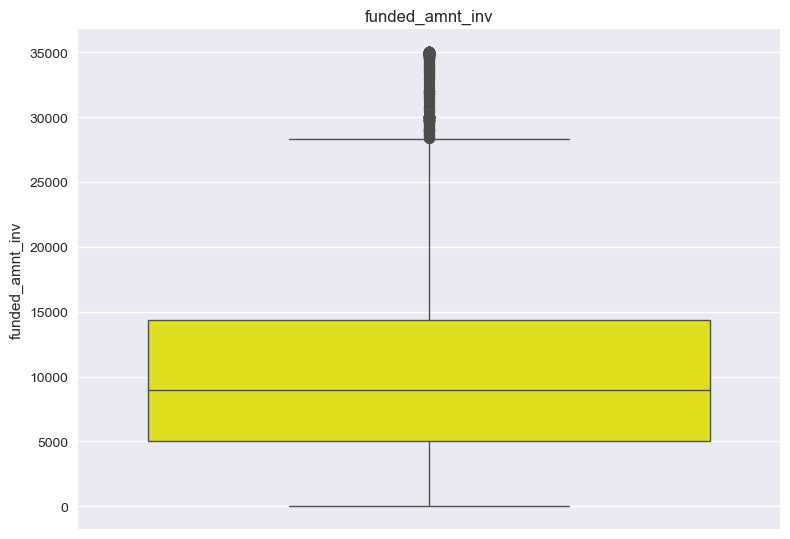

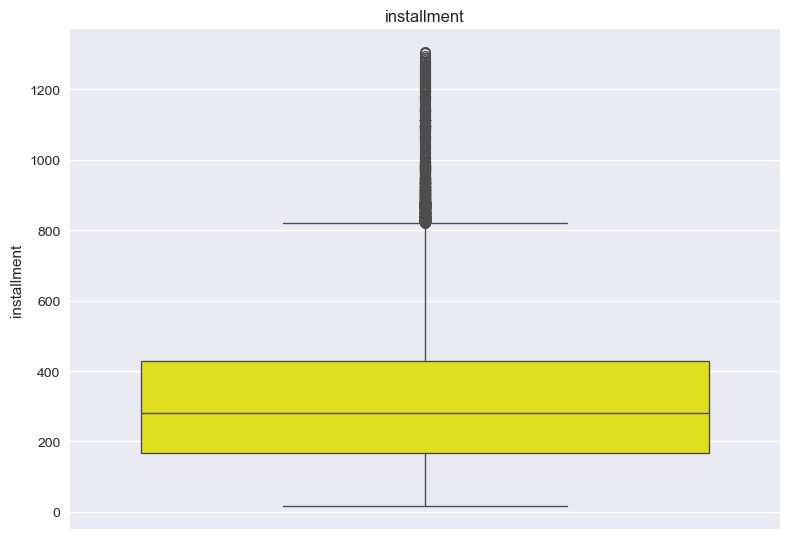

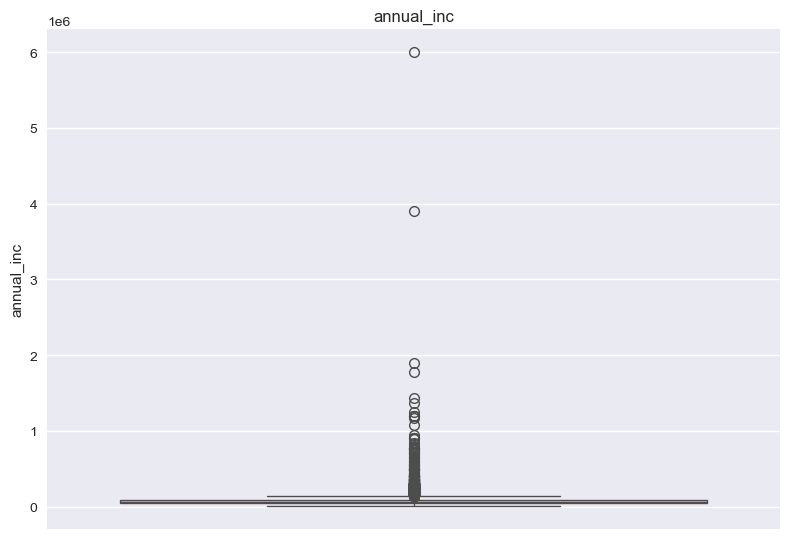

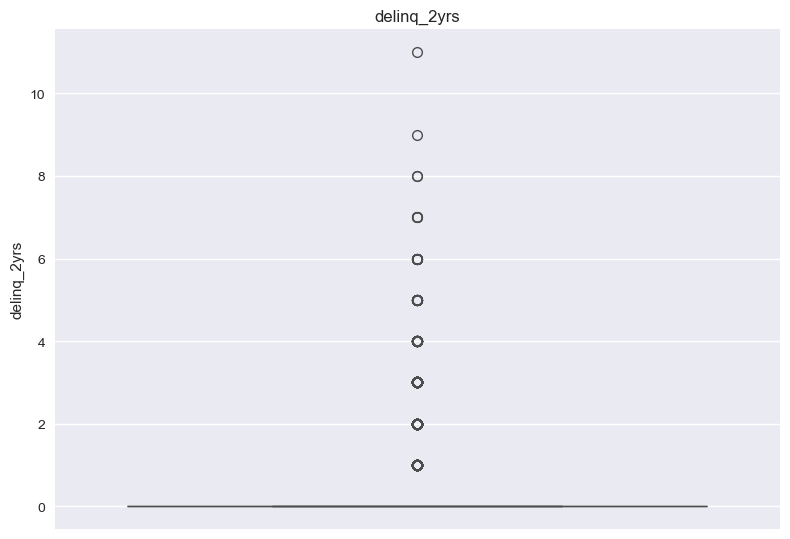

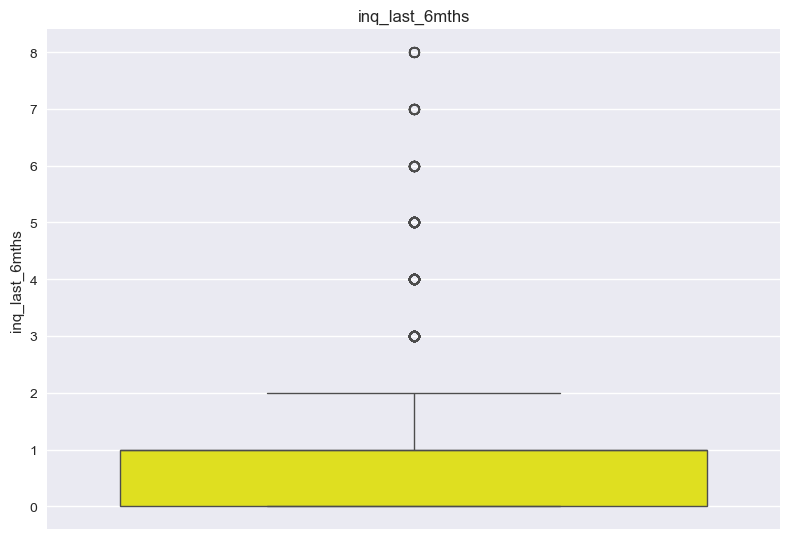

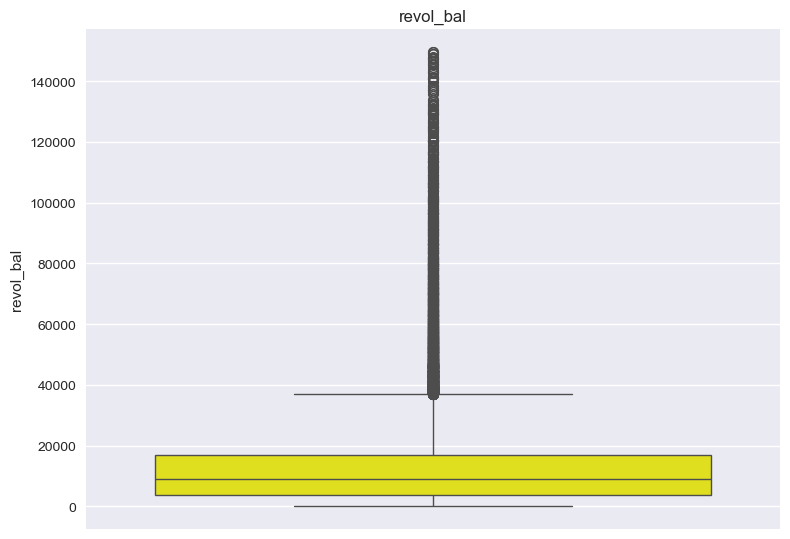

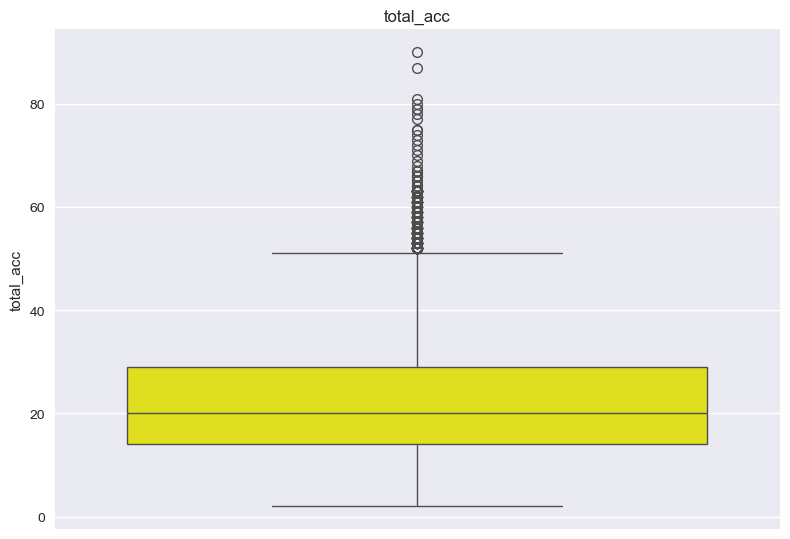

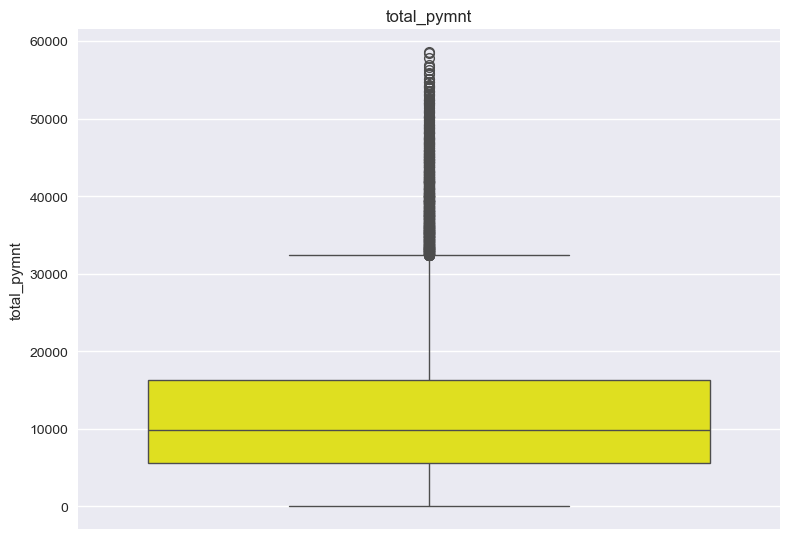

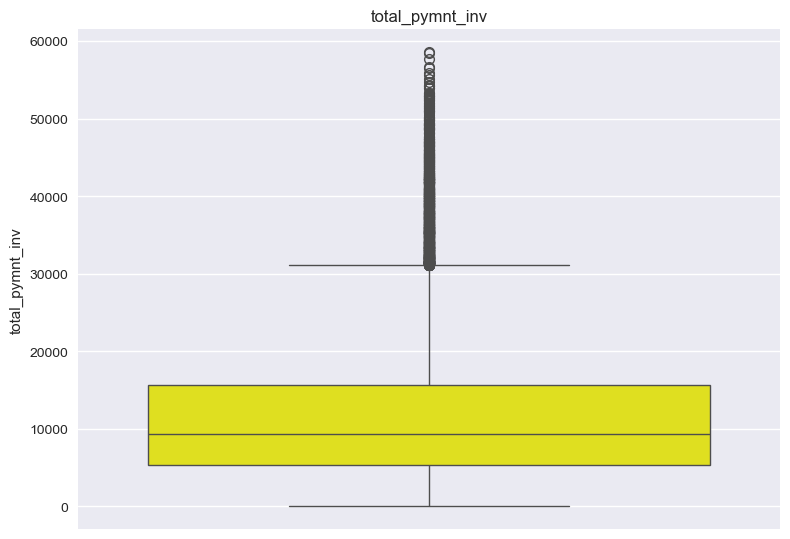

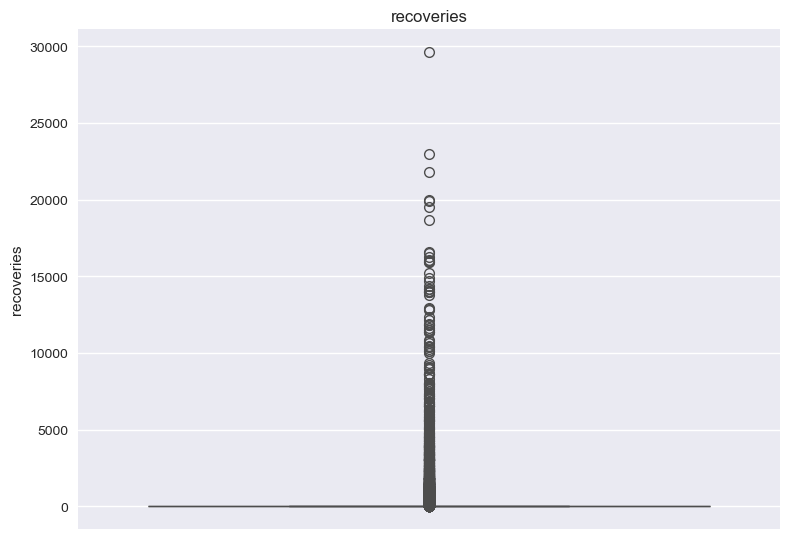

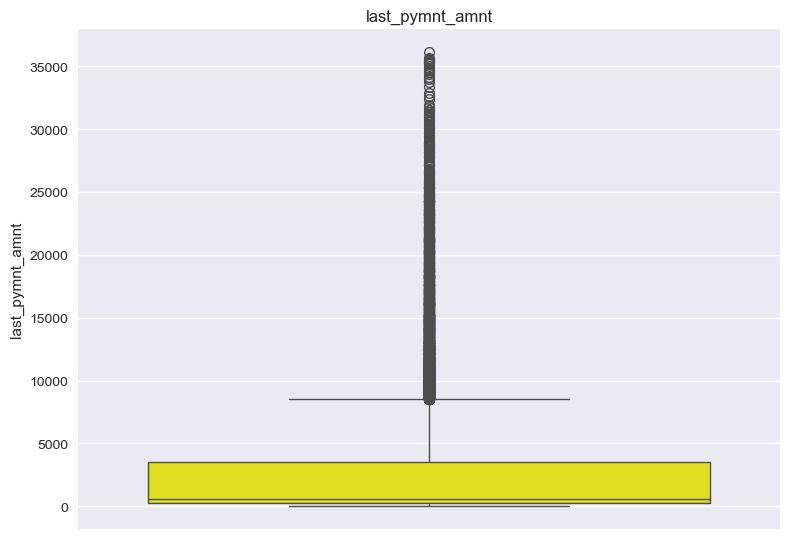

In [33]:
# cols for Univariate BOX PLOT Analysis
#    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment','annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_bal',
#   'revol_util', 'total_acc','total_pymnt ','total_pymnt_inv', 'recoveries', 'last_pymnt_amnt'

# Round 1: 
cols1 = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment","annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "revol_bal",
        "revol_util", "total_acc", "total_pymnt","total_pymnt_inv", "recoveries", "last_pymnt_amnt"]

# Round 2: # no Outliers - "dti", "revol_util", hence removing them from List.

cols = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment","annual_inc", "delinq_2yrs", "inq_last_6mths", "revol_bal"
        , "total_acc", "total_pymnt","total_pymnt_inv", "recoveries", "last_pymnt_amnt"]

for i, col in enumerate(cols):
    sns.boxplot(y=(loan[col]), color='yellow').set_title(cols[i])
    plt.tight_layout()
    plt.show()

In [34]:
loan.shape

(36847, 43)

In [35]:
# Function Definition - Identify & Remove outliers based on IQR Method

def rem_outlier_iqr(df, columns, threshold):
    for col in columns:
        Q1 = df[col].quantile(0.25) # get 25th percentile
        Q3 = df[col].quantile(0.75) # get 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
       # df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

 #Remove outliers from the DataFrame

loan =rem_outlier_iqr(loan, cols,1.5)

In [36]:
loan.shape

(20129, 43)

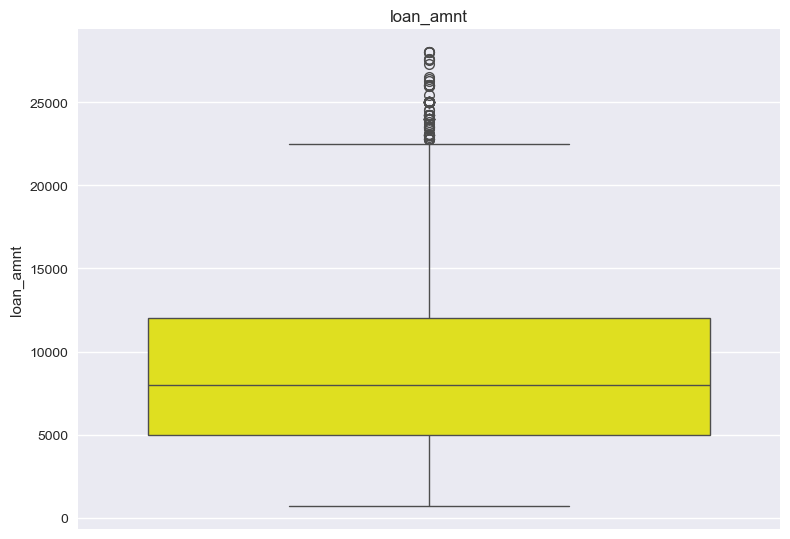

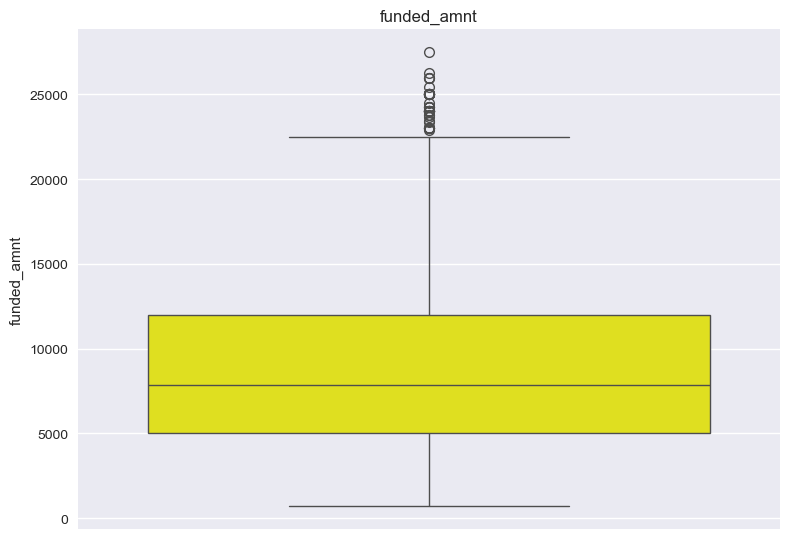

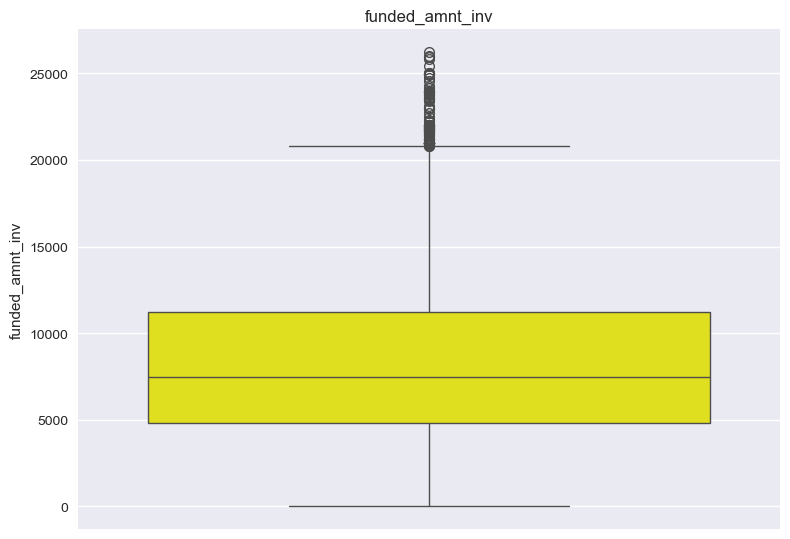

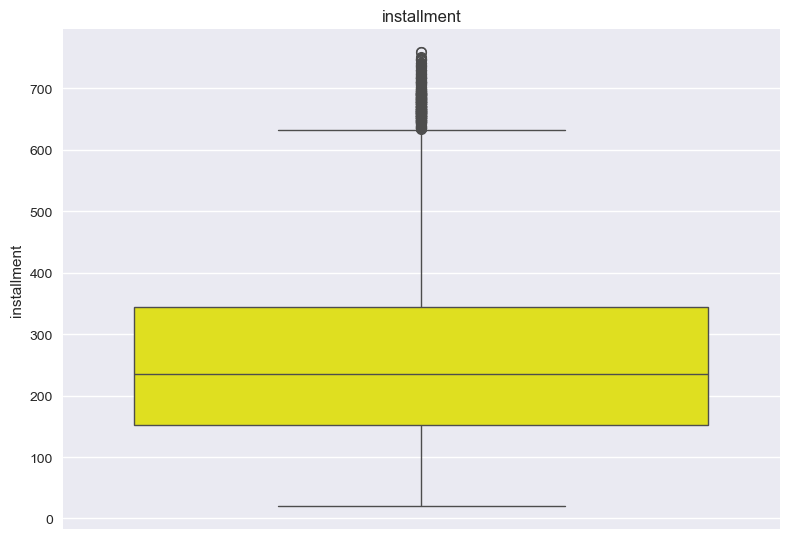

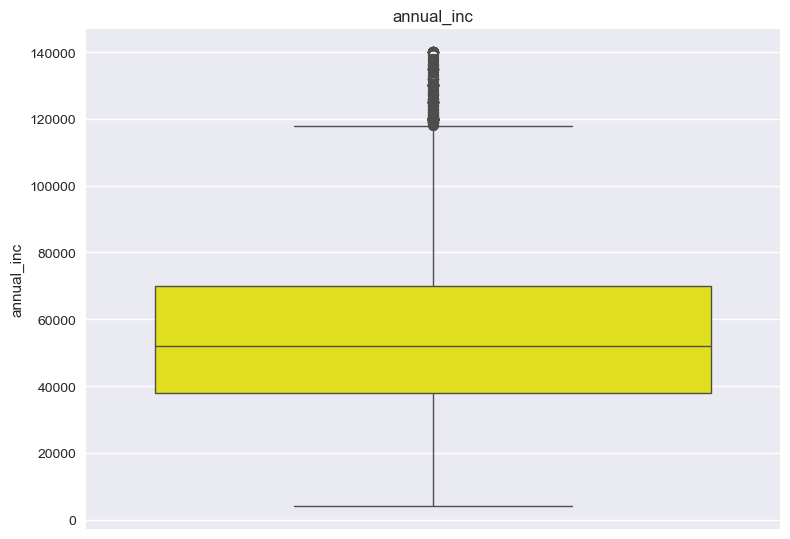

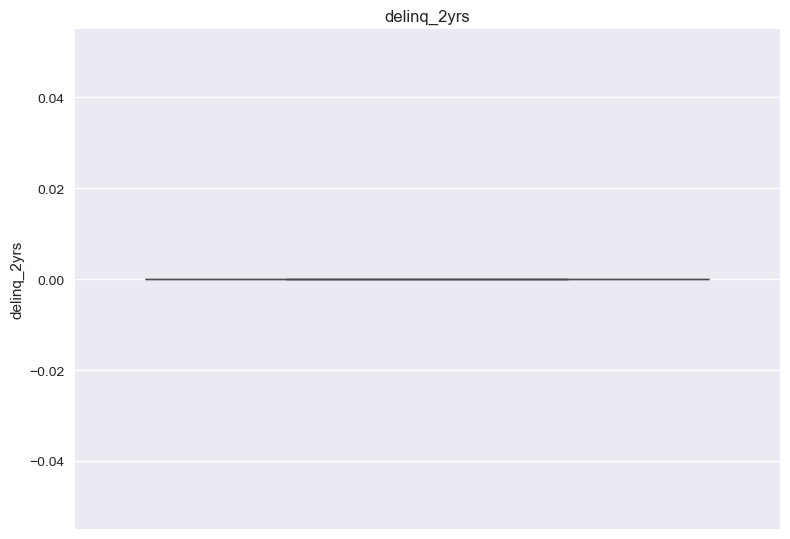

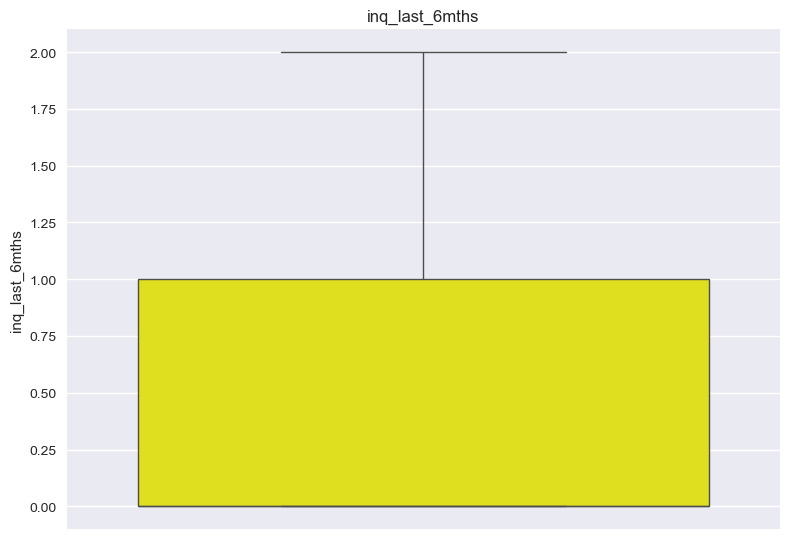

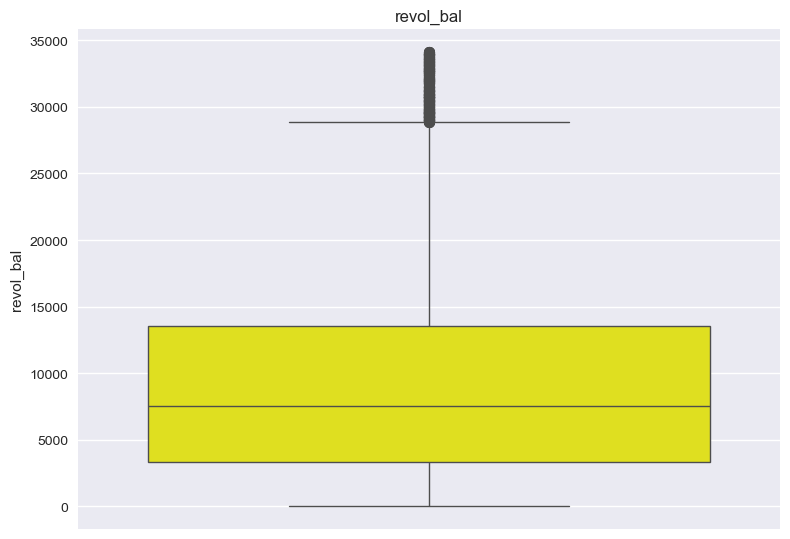

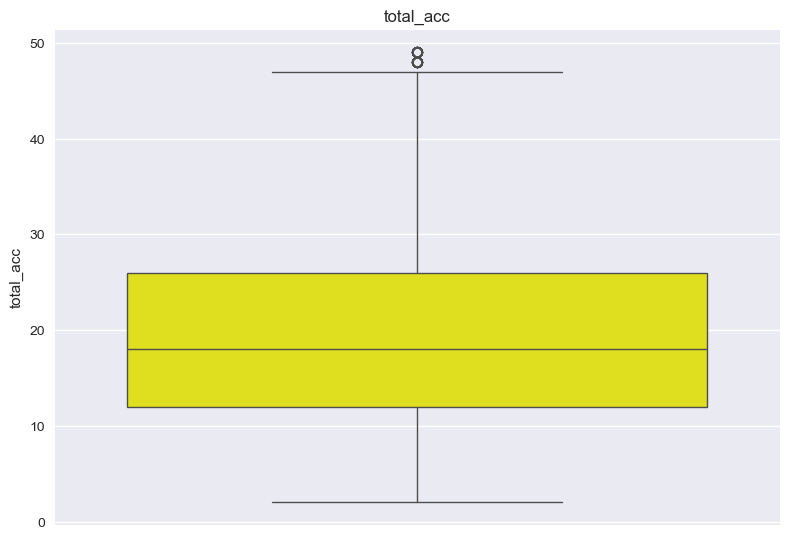

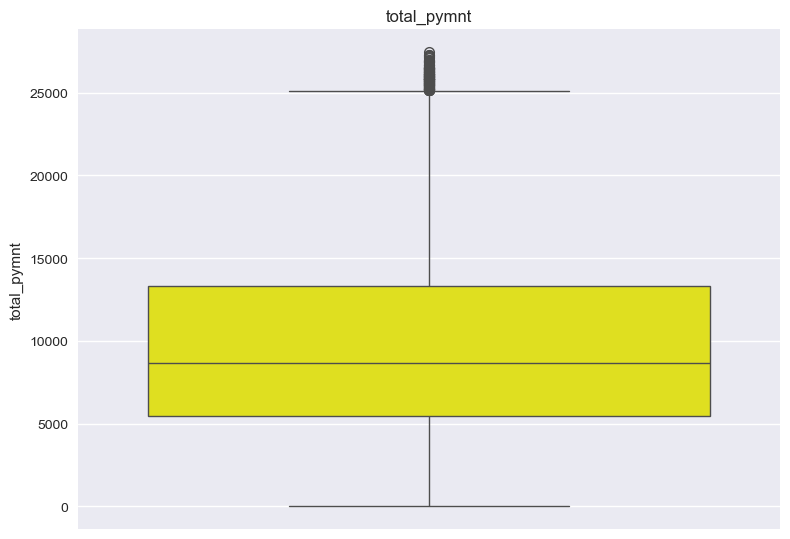

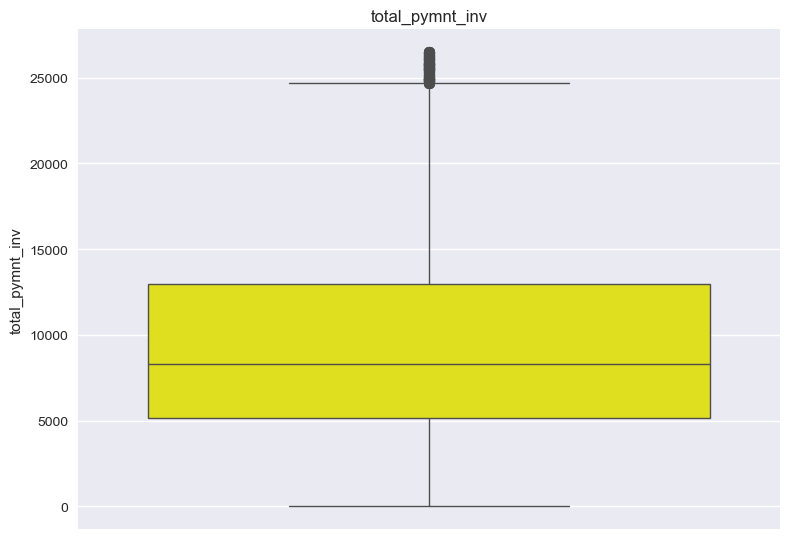

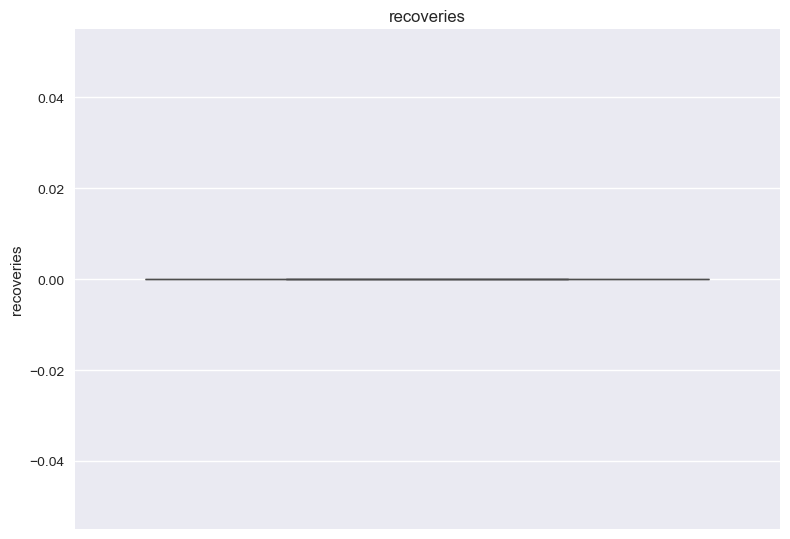

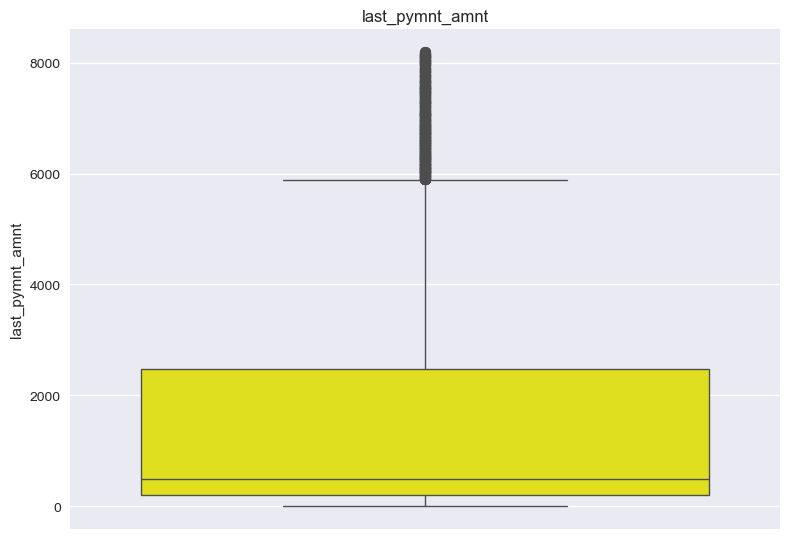

In [37]:
# Again Performing the Univariate analysis using Box Plot after, 1st round of handling outliers

for i, col in enumerate(cols):
    sns.boxplot(y=(loan[col]), color='yellow').set_title(cols[i])
    plt.tight_layout()
    plt.show()

In [38]:
# Resetting index

loan.reset_index (inplace = True, drop = True)

#loan =rem_outlier_iqr(loan, cols,1.5)
#loan.shape

In [39]:
# Again Performing the Univariate analysis using Box Plot after, 2nd round of handing outliers

#for i, col in enumerate(cols):
    #sns.boxplot(y=(loan[col]), color='yellow').set_title(cols[i])
    #plt.tight_layout()
    #plt.show()

### Step 6: Univariate, Segemented Univariate & Bivariate Analysis

#### ***Home Ownership*** : Univariate, Segemented Univariate & Bivariate Analysis

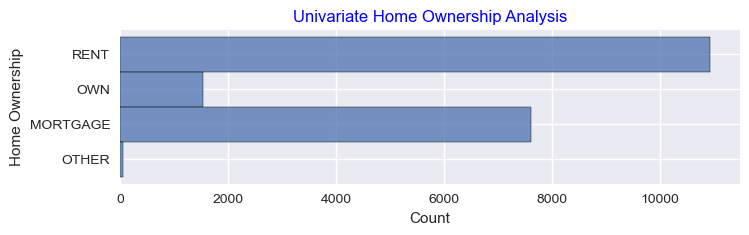

In [42]:
# Univariate analysis ==> home_ownership

plt.figure(figsize=(8,2))
sns.histplot(data=loan, y="home_ownership")
plt.xlabel('Count')
plt.ylabel('Home Ownership')
plt.title('Univariate Home Ownership Analysis',fontsize=12, color = 'b')
plt.show()

**Observation**: Majority of Loan Borrowers don't posses property and are on mortage or rent.



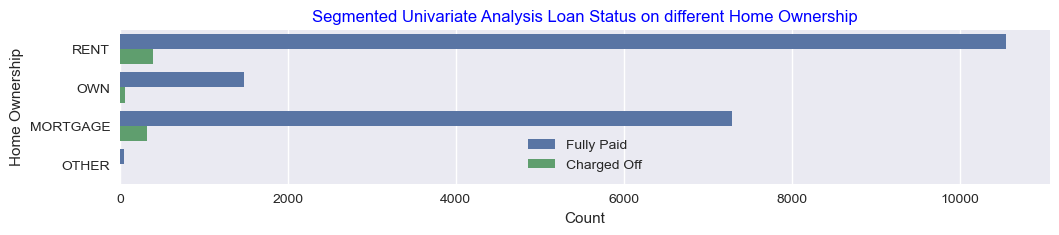

In [44]:
# Segmented Univariate Analysis ==> Distribution of house_ownership based on loan_status
plt.figure(figsize=(12,2))
sns.countplot(data=loan,y='home_ownership',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Home Ownership')
plt.title('Segmented Univariate Analysis Loan Status on different Home Ownership',fontsize=12, color = 'b')
plt.legend(loc='lower center')
plt.show()

**Observation**: The Charged Off cases are lower incase of loan borrowers who owns a property compared to those who stay on rent or  mortgage.

In [46]:
# Bivariate Analysis of Home Ownership & Chargedoff_Ratio

# Code for aggregating the dataset grouping by "Home Ownership" & "Loan Status".

ownership_loan_status = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ownership_loan_status['Chargedoff_Ratio'] = round((ownership_loan_status['Charged Off'] / (ownership_loan_status["Charged Off"]+ ownership_loan_status['Fully Paid'])*100),2)
ownership_loan_status.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Chargedoff_Ratio
0,MORTGAGE,326,7285,4.28
1,OTHER,2,50,3.85
2,OWN,57,1473,3.73
3,RENT,390,10546,3.57


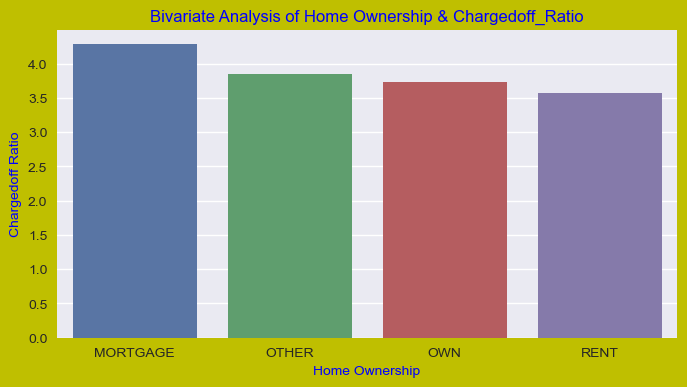

In [47]:
# Bivariate Analysis of Home Ownership & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(8,4),facecolor='y')
plt.title('Bivariate Analysis of Home Ownership & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='home_ownership', y='Chargedoff_Ratio', data=ownership_loan_status, hue = 'home_ownership')
plt.xlabel('Home Ownership',fontsize=10,color='b')
plt.ylabel('Chargedoff Ratio',fontsize=10,color = 'b')
plt.show()

***Observation*** The chart shows that homeownership has little impact on charged-off ratios, with all categories showing similar default rates. Having a mortgage might indicate higher financial obligations, which could increase the risk of default. However, homeownership itself doesn't seem to be a strong predictor of default.

#### ***Purpose of Loan*** : Univariate, Segemented Univariate & Bivariate Analysis

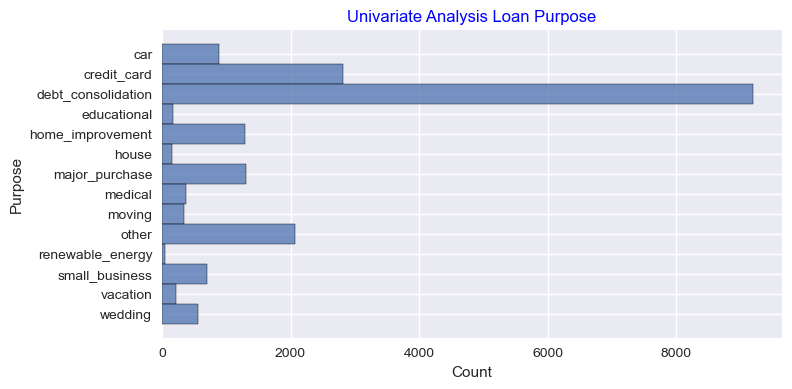

In [50]:
# Univariate analysis ==> Purpose

plt.figure(figsize=(8,4))
sns.histplot(data=loan, y=sorted(loan["purpose"]))
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Univariate Analysis Loan Purpose',fontsize=12,color = 'b')
plt.show()

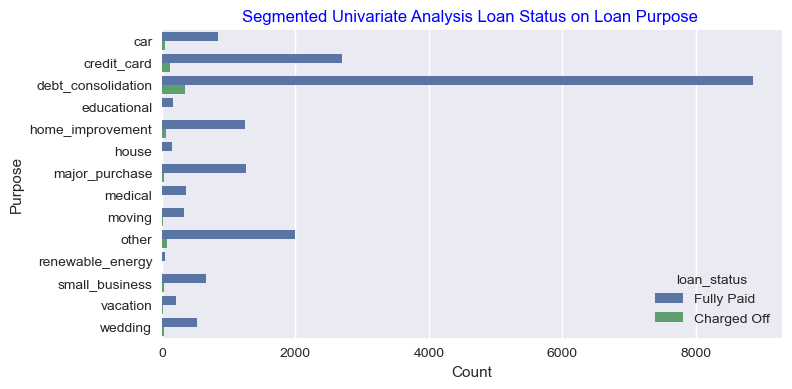

In [51]:
# Segmented Univariate Analysis ==> Distribution of Purpose based on loan_status

plt.figure(figsize=(8,4))
sns.countplot(data=loan,y=sorted(loan["purpose"]),hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Segmented Univariate Analysis Loan Status on Loan Purpose ',fontsize=12, color = 'b')
plt.show()

**Observation**: In terms of counts, A very large percentage of loans are taken for "debt consolidation followed by credit card.

In [53]:
# Bivariate Analysis of Purpose & Chargedoff_Ratio

# Code for aggregating the dataset grouping by "Purpose" & "Loan Status".

purpose_loan_status = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan_status['Chargedoff_Ratio'] = round((purpose_loan_status['Charged Off'] / (purpose_loan_status["Charged Off"]+ purpose_loan_status['Fully Paid'])*100),2)
purpose_loan_status = purpose_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
purpose_loan_status

loan_status,purpose,Charged Off,Fully Paid,Chargedoff_Ratio
11,small_business,48,645,6.93
12,vacation,14,211,6.22
7,medical,18,355,4.83
2,debt_consolidation,413,8776,4.49
9,other,93,1980,4.49
3,educational,7,167,4.02
10,renewable_energy,2,49,3.92
4,home_improvement,36,1256,2.79
8,moving,9,336,2.61
1,credit_card,73,2740,2.60


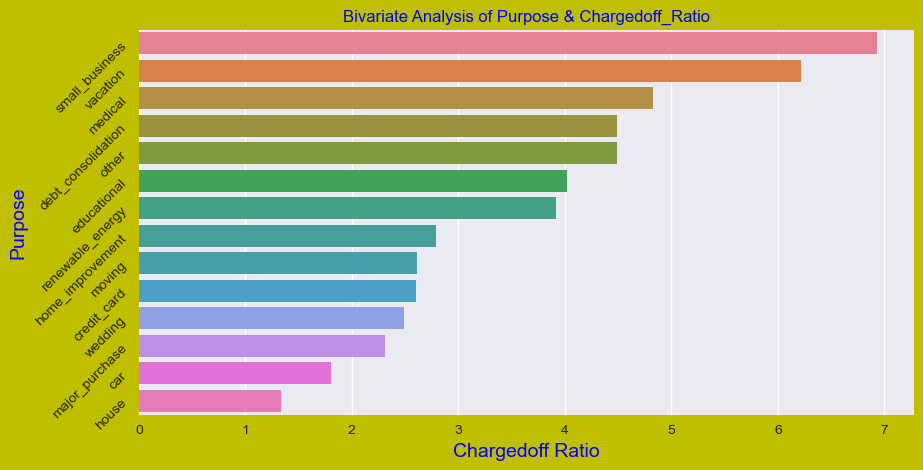

In [54]:
# Bivariate Analysis of Purpose & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(10,5),facecolor='y')
plt.title('Bivariate Analysis of Purpose & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(y='purpose', x='Chargedoff_Ratio', data=purpose_loan_status, hue = 'purpose')
plt.xlabel('Chargedoff Ratio',fontsize=14,color='b')
plt.ylabel('Purpose',fontsize=14,color = 'b')
plt.yticks(rotation=45)
plt.show()

***Observation :*** loan purpose has a significant impact on charged-off ratios.
Loans for ***"small_business" and "vacation"*** have the highest charged-off ratios, indicating a higher risk of default.
Loans for ***"house" and "car"*** have the lowest charged-off ratios, suggesting a lower risk of default. Loans for **personal expenses** may be less secured and ***have higher risk*** profiles. Loans for ***assets may have collateral or be secured***, reducing the risk of default.

#### ***Verification_status of Loan*** : Univariate, Segemented Univariate & Bivariate Analysis

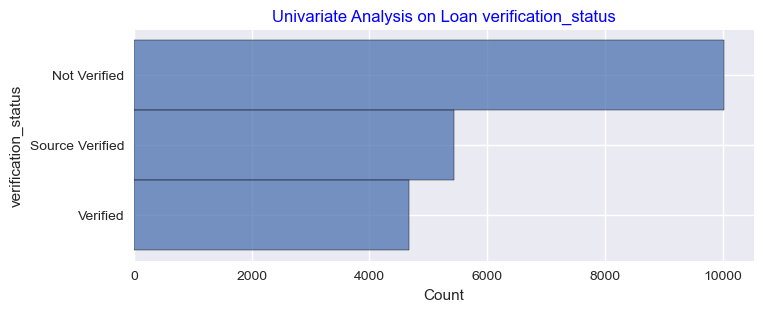

In [57]:
# Univariate analysis ==> Verification Status

plt.figure(figsize=(8,3))
sns.histplot(data=loan, y=sorted(loan["verification_status"]))
plt.xlabel('Count')
plt.ylabel('verification_status')
plt.title('Univariate Analysis on Loan verification_status',fontsize=12, color ='b')
plt.show()

**Observation:** Only 50% of the Loan borrowers applications are verified by the company or have source verified.

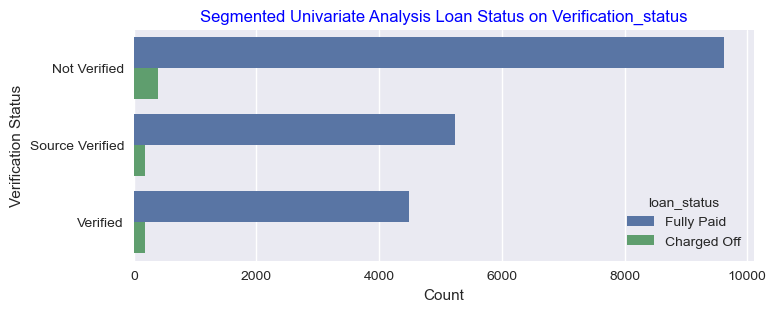

In [59]:
# Segmented Univariate Analysis ==> Distribution of Verification Status on loan_status

plt.figure(figsize=(8,3))
sns.countplot(data=loan,y=sorted(loan["verification_status"]),hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Verification Status')
plt.title('Segmented Univariate Analysis Loan Status on Verification_status',fontsize=12, color = 'b')
plt.show()

In [60]:
# Bivariate Analysis of Verification_status & Chargedoff_Ratio

# Code for aggregating the dataset grouping by "Verification_status" & "Loan Status".

verification_loan_status = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_loan_status['Chargedoff_Ratio'] = round((verification_loan_status['Charged Off'] / (verification_loan_status["Charged Off"]+ verification_loan_status['Fully Paid'])*100),2)
verification_loan_status = verification_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
verification_loan_status

loan_status,verification_status,Charged Off,Fully Paid,Chargedoff_Ratio
2,Verified,255,4417,5.46
0,Not Verified,341,9685,3.40
1,Source Verified,179,5252,3.30


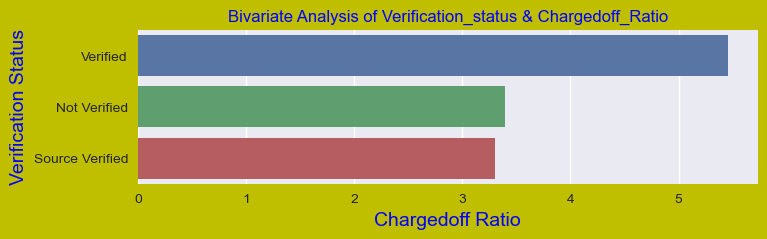

In [61]:
# Bivariate Analysis of Verification Status & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(8,2),facecolor='y')
plt.title('Bivariate Analysis of Verification_status & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(y='verification_status', x='Chargedoff_Ratio', data=verification_loan_status, hue = 'verification_status')
plt.xlabel('Chargedoff Ratio',fontsize=14,color='b')
plt.ylabel('Verification Status',fontsize=14,color = 'b')
plt.show()

***Observation*** It is seen that, out of all the applications, only 50% of the application are verified or source verified. And still the charge-Offs ratio is higher in verified loans. Which infers that the verification process needs to be scrutinized, to be more effective.

#### ***Loan Status*** : Univariate, Segemented Univariate & Bivariate Analysis

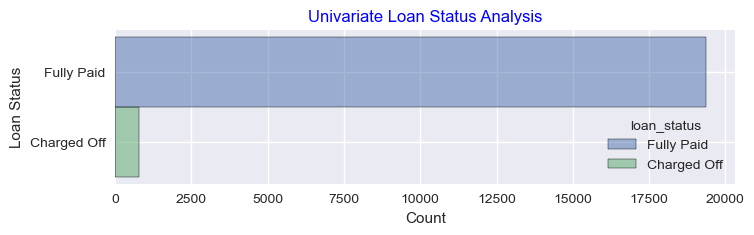

In [64]:
# Univariate analysis ==> loan_status

plt.figure(figsize=(8,2))
sns.histplot(data=loan, y="loan_status", hue = "loan_status")
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title('Univariate Loan Status Analysis',fontsize=12, color ='b')
plt.show()

**Observation:** Count of Charged off loan are very low compared to count of Fully Paid loans.

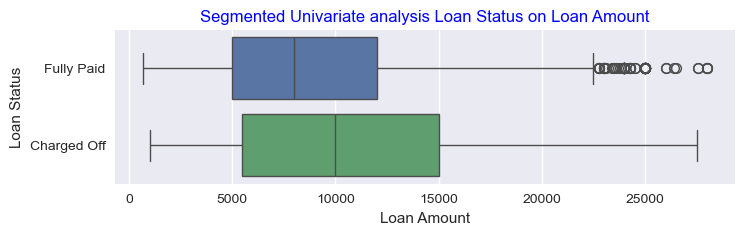

In [66]:
# Segmented Univariate Analysis ==> Distribution of loan_amnt based on loan_status

plt.figure(figsize=(8,2))
sns.boxplot(data=loan,x='loan_amnt',y = 'loan_status', hue = 'loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Segmented Univariate analysis Loan Status on Loan Amount',fontsize=12, color ='b')
plt.show()

**Observation**: Fully paid loans tend to have lower maximum loan amounts compared to charged-off loans. Charged-off loans have a longer right whisker, indicating a larger number of borrowers(defaulters) with higher loan amounts. **Larger loan amounts are associated with a higher risk of default**.

In [68]:
loan["loan_amnt"].describe()

count    20129.000000
mean      8683.733668
std       4942.386362
min        700.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      28000.000000
Name: loan_amnt, dtype: float64

In [69]:
# Bucketting Loan Amount - -- Based on above quartile information
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [70]:
# Bivariate Analysis of Loan Amount & Chargedoff_Ratio

# Code for aggregating the dataset grouping by "Loan Amount" & "Loan Status".

loanamount_loan_status = loan.groupby(['loan_amnt_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loanamount_loan_status['Chargedoff_Ratio'] = round((loanamount_loan_status['Charged Off'] / (loanamount_loan_status["Charged Off"]+ loanamount_loan_status['Fully Paid'])*100),2)
loanamount_loan_status = loanamount_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
#loanamount_loan_status = loanamount_loan_status[loanamount_loan_status["Chargedoff_Ratio"].notnull()]
loanamount_loan_status

loan_status,loan_amnt_b,Charged Off,Fully Paid,Chargedoff_Ratio
2,15K - above,181,1816,9.06
1,10K - 15K,168,3981,4.05
3,5K - 10K,248,7813,3.08
0,0 - 5K,178,5744,3.01


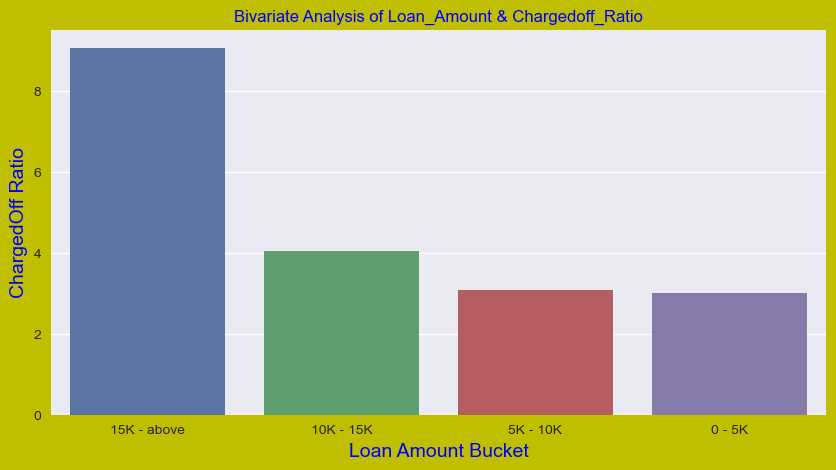

In [71]:
# Bivariate Analysis of Loan Amount & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(10,5),facecolor='y')
plt.title('Bivariate Analysis of Loan_Amount & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='loan_amnt_b', y='Chargedoff_Ratio', data=loanamount_loan_status, hue = 'loan_amnt_b' )
plt.xlabel('Loan Amount Bucket',fontsize=14,color='b')
plt.ylabel('ChargedOff Ratio',fontsize=14,color = 'b')
plt.show()

***Observation*** The Charge Off ratio of all the customers having loan_amount  ***15K and above*** is the highest where as a decreasing trend with decrease in loan amount. Larger loan amounts may be associated with riskier borrowers or projects.

#### ***Debt to Income (DTI) ratio*** : Univariate, Segemented Univariate & Bivariate Analysis

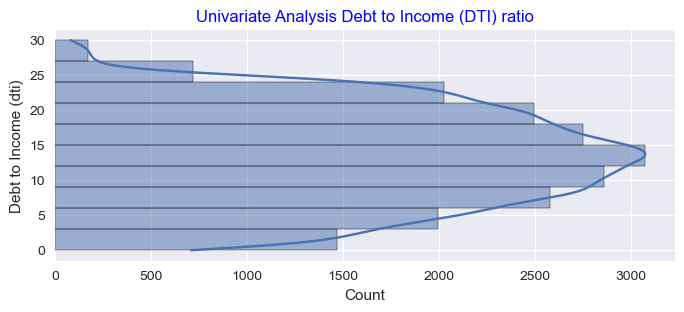

In [74]:
# Univariate analysis ==> Debt to Income(DTI) ratio

plt.figure(figsize=(8,3))
sns.histplot(data=loan, y="dti", bins=10, kde=True)
plt.xlabel('Count')
plt.ylabel('Debt to Income (dti)')
plt.title('Univariate Analysis Debt to Income (DTI) ratio',fontsize=12, color ='b')
plt.show()

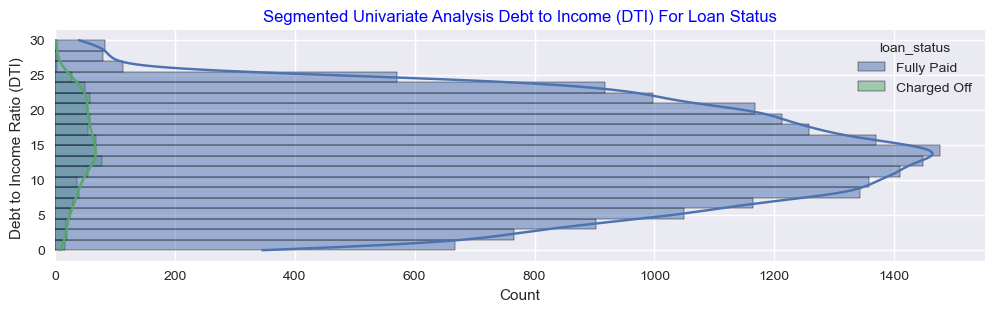

In [75]:
# Segmented Univariate analysis - Distribution of DTI based on loan Status

plt.figure(figsize=(12,3))
sns.histplot(data=loan,y='dti',hue='loan_status',bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Debt to Income Ratio (DTI) ')
plt.title('Segmented Univariate Analysis Debt to Income (DTI) For Loan Status',fontsize=12, color ='b')
plt.show()

***Observation*** Charged Off pattern is high incases where DTI ratios are between 5 to 25%

In [77]:
loan['dti'].describe()

count    20129.000000
mean        13.125839
std          6.699987
min          0.000000
25%          7.900000
50%         13.130000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [78]:
# Bucketing dti -- Based on above quartile information
def bucket_dti(column):
    if column <= 8:
        return 'Very Low (<= 8 %)' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low ( 8 - 12 %)'    
    elif (column >12) and (column <= 16):
        return 'Moderate (12 - 16 %)'
    elif (column >16) and (column <= 20):
        return 'High (16 - 20 %)'
    else:
        return 'Very High ( > 20 %)' # 75% quartile
    
loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [79]:
# Bivariate Analysis of "dti bucket" & "Chargedoff_Ratio"

# Code for aggregating the dataset grouping by "dti bucket" & "Loan Status".

dti_bucket_loan_status = loan.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_bucket_loan_status['Chargedoff_Ratio'] = round((dti_bucket_loan_status['Charged Off'] / (dti_bucket_loan_status["Charged Off"]+ dti_bucket_loan_status['Fully Paid'])*100),2)
dti_bucket_loan_status = dti_bucket_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
dti_bucket_loan_status

loan_status,dti_b,Charged Off,Fully Paid,Chargedoff_Ratio
3,Very High ( > 20 %),186,3498,5.05
2,Moderate (12 - 16 %),188,3845,4.66
0,High (16 - 20 %),156,3331,4.47
1,Low ( 8 - 12 %),118,3673,3.11
4,Very Low (<= 8 %),127,5007,2.47


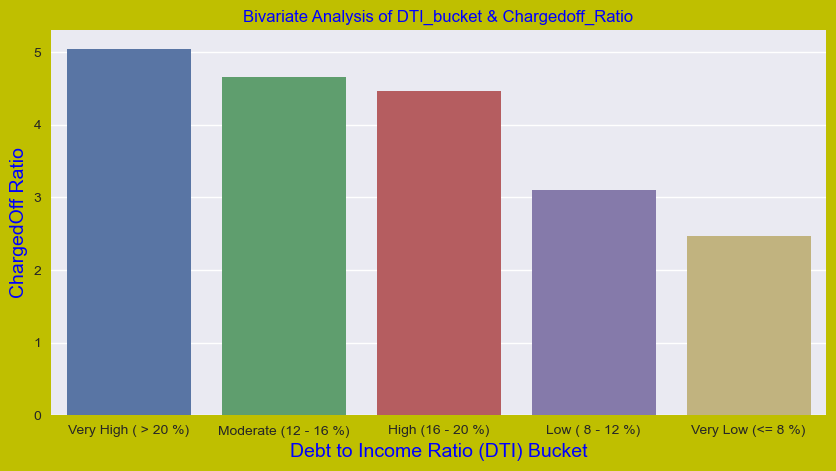

In [80]:
# Bivariate Analysis of "dti bucket" & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(10,5),facecolor='y')
plt.title('Bivariate Analysis of DTI_bucket & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='dti_b', y='Chargedoff_Ratio', data=dti_bucket_loan_status, hue = 'dti_b')
plt.xlabel('Debt to Income Ratio (DTI) Bucket',fontsize=14,color='b')
plt.ylabel('ChargedOff Ratio',fontsize=14,color = 'b')
plt.show()

***Observation*** Trend of increasing charged-off ratio as DTI increases. ***Individuals with higher DTI ratios are more likely to default on their loans***. Higher DTI ratios may indicate financial stress, making it more difficult for borrowers to meet their loan obligations.

#### ***Annual Income***: Univariate, Segmented Univariate & Bivariate Analysis

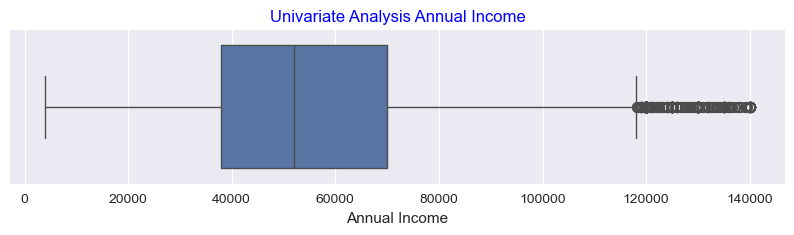

count     20129.000000
mean      56432.248667
std       25435.811509
min        4000.000000
25%       38000.000000
50%       51996.000000
75%       70000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [83]:
# Univariate Analysis Annual Income

plt.figure(figsize=(10,2))
sns.boxplot(data=loan,x='annual_inc')
plt.xlabel('Annual Income')
plt.title('Univariate Analysis Annual Income',fontsize=12, color ='b')
plt.show()
loan["annual_inc"].describe()

***Observation*** Majority of the loans Borrowers are in the range of Annual Income range of 35K to 70K, and hence more the number of Charged Off cases in this range of salary too.

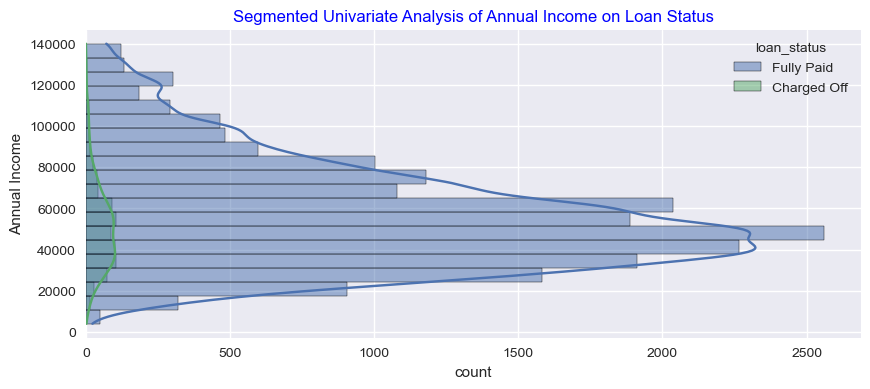

In [85]:
# Segmented Univariate Analysis of annual_inc based on loan_status

plt.figure(figsize=(10,4))
sns.histplot(data=loan, y='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('count')
plt.ylabel('Annual Income')
plt.title('Segmented Univariate Analysis of Annual Income on Loan Status',fontsize=12, color ='b')
plt.show()

**Observation**: Loan Borrowers with annual income between ***25K to 65K*** are more likely to default. Higher annual income borrowers ***> 80K*** are less likely to default. Higher annual income may be a factor associated with a higher likelihood of loan repayment whereas lower annual incomes may be more likely to default on their loans.

In [87]:
loan["annual_inc"].describe()

count     20129.000000
mean      56432.248667
std       25435.811509
min        4000.000000
25%       38000.000000
50%       51996.000000
75%       70000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [88]:
# Bucketing Annual Income -- Based on above quartile information
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [89]:
# Bivariate Analysis of "Annual Income Bucket" & "Chargedoff_Ratio"

# Code for aggregating the dataset grouping by "Annual Income Bucket" & "Loan Status".

annual_inc_bucket_loan_status = loan.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_bucket_loan_status['Chargedoff_Ratio'] = round((annual_inc_bucket_loan_status['Charged Off'] / (annual_inc_bucket_loan_status["Charged Off"]+ annual_inc_bucket_loan_status['Fully Paid'])*100),2)
annual_inc_bucket_loan_status = annual_inc_bucket_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
annual_inc_bucket_loan_status

loan_status,annual_inc_b,Charged Off,Fully Paid,Chargedoff_Ratio
2,50k to 60k,167,3065,5.17
0,0 - 40k,276,5869,4.49
3,60k to 70k,81,2119,3.68
4,70k to 80k,61,1660,3.54
1,40k - 50k,123,3422,3.47
5,80k - above,67,3219,2.04


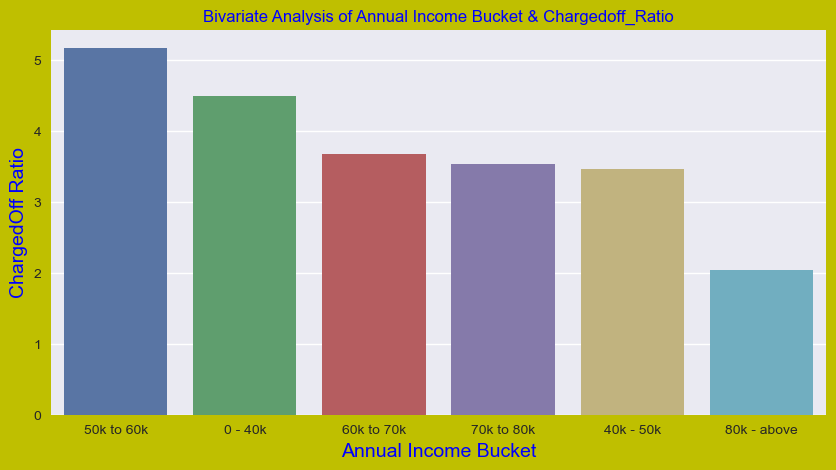

In [90]:
# Bivariate Analysis of "Annual Income Bucket" & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(10,5),facecolor='y')
plt.title('Bivariate Analysis of Annual Income Bucket & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='annual_inc_b', y='Chargedoff_Ratio', data=annual_inc_bucket_loan_status, hue = 'annual_inc_b')
plt.xlabel('Annual Income Bucket',fontsize=14,color='b')
plt.ylabel('ChargedOff Ratio',fontsize=14,color = 'b')
plt.show()

***Observations*** Income range ***"80K & above"***  has the ***least*** chance of defaulting. Income range ***50K-60K*** has ***highest*** chances of defaulting. Otherwise, general trend of decreasing charged-off ratio as annual income increases.

#### ***Interest Rate*** : Univariate, Segemented Univariate & Bivariate Analysis

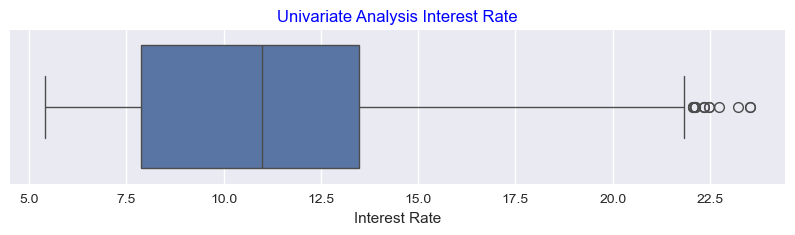

count    20129.000000
mean        11.036188
std          3.399549
min          5.420000
25%          7.880000
50%         10.990000
75%         13.480000
max         23.520000
Name: int_rate, dtype: float64

In [93]:
# Univariate Analysis Interest Rate

plt.figure(figsize=(10,2))
sns.boxplot(data=loan,x='int_rate')
plt.xlabel('Interest Rate')
plt.title('Univariate Analysis Interest Rate',fontsize=12, color ='b')
plt.show()
loan["int_rate"].describe()

**Observation** Most of the applicant's rate of interest is between in the range of ***7.8 %-13.5%***. Average Rate of interest of rate is ***11 %***. 

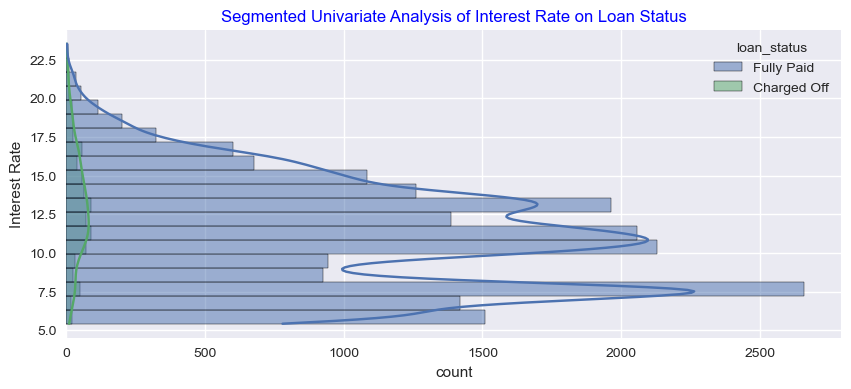

In [95]:
# Segmented Univariate Analysis Interest Rate

plt.figure(figsize=(10,4))
sns.histplot(data=loan, y='int_rate',hue='loan_status',bins=20,kde=True)
plt.xlabel('count')
plt.ylabel('Interest Rate')
plt.title('Segmented Univariate Analysis of Interest Rate on Loan Status',fontsize=12, color ='b')
plt.show()

In [96]:
loan["int_rate"].describe()

count    20129.000000
mean        11.036188
std          3.399549
min          5.420000
25%          7.880000
50%         10.990000
75%         13.480000
max         23.520000
Name: int_rate, dtype: float64

In [97]:
# Bucketing Interest Rate -- Based on above quartile information

def bucket_int_rate(column):
    if column <= 8:
        return 'Very Low (<= 8%)' # 25% quartile
    elif (column >8) and (column <= 11):
        return 'Low (8-11%)'    
    elif (column >11) and (column <= 13):
        return 'Moderate (11-13%)'
    elif (column >13) and (column <= 15):
        return 'High (13-15%)'
    else:
        return 'Very High (> 15%)' # 75% quartile
    
loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [98]:
# Bivariate Analysis of "Interest Rate Bucket" & "Chargedoff_Ratio"

# Code for aggregating the dataset grouping by "Interest Rate Bucket" & "Loan Status".

int_rate_bucket_loan_status = loan.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bucket_loan_status['Chargedoff_Ratio'] = round((int_rate_bucket_loan_status['Charged Off'] / (int_rate_bucket_loan_status["Charged Off"]+ int_rate_bucket_loan_status['Fully Paid'])*100),2)
int_rate_bucket_loan_status = int_rate_bucket_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
int_rate_bucket_loan_status

loan_status,int_rate_b,Charged Off,Fully Paid,Chargedoff_Ratio
3,Very High (> 15%),211,2448,7.94
0,High (13-15%),157,3037,4.92
2,Moderate (11-13%),181,3724,4.64
1,Low (8-11%),138,4554,2.94
4,Very Low (<= 8%),88,5591,1.55


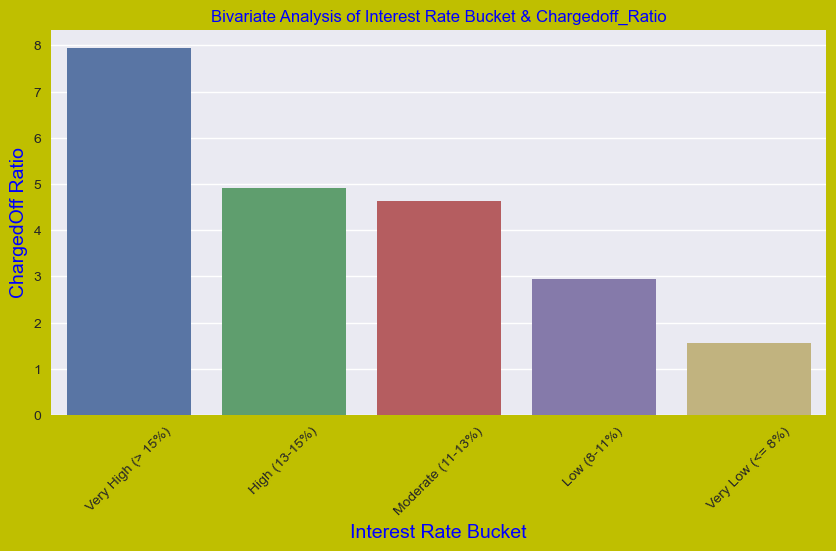

In [99]:
# Bivariate Analysis of "Interest Rate Bucket" & Chargedoff_Ratio

# Code for plotting bar plot

plt.figure(figsize=(10,5),facecolor='y')
plt.title('Bivariate Analysis of Interest Rate Bucket & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='int_rate_b', y='Chargedoff_Ratio', data=int_rate_bucket_loan_status, hue = 'int_rate_b')
plt.xlabel('Interest Rate Bucket',fontsize=14,color='b')
plt.ylabel('ChargedOff Ratio',fontsize=14,color = 'b')
plt.xticks(rotation=45)
plt.show()

***Observation*** Maximum number of loans were offered in the very Low & Low interest rates ranges and charge Offs were least in this interest range. As the interest rate started increasing Above 11%, the Defauling of borrowers increased. 

#### ***Address State*** : Univariate & Bivariate Analysis

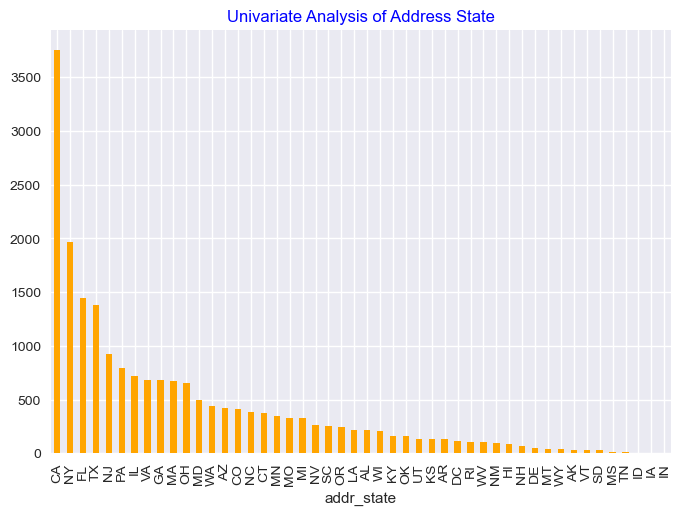

In [102]:
# Univariate Analysis - Address_State

loan["addr_state"].value_counts().plot.bar(color = 'Orange')
plt.title('Univariate Analysis of Address State',fontsize=12, color ='b')
plt.show()

**Observation**: Majority of the Loan borrowers are from the large urban cities like california, new york, florida, texas etc.

In [104]:
# Bivariate Analysis on Address state against Chargedoff_Ratio -

# Code for aggregating the dataset grouping by "Address State" & "Loan Status".

addr_state_loan_status = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_loan_status['Chargedoff_Ratio'] = round((addr_state_loan_status['Charged Off'] / (addr_state_loan_status['Charged Off']+ addr_state_loan_status['Fully Paid'])*100),2)
addr_state_loan_status = addr_state_loan_status.sort_values('Chargedoff_Ratio', ascending=False)
addr_state_loan_status

loan_status,addr_state,Charged Off,Fully Paid,Chargedoff_Ratio
39,TN,1.0,6.0,14.29
43,VT,3.0,28.0,9.68
24,MS,1.0,12.0,7.69
38,SD,2.0,28.0,6.67
29,NM,6.0,88.0,6.38
10,GA,43.0,634.0,6.35
44,WA,28.0,414.0,6.33
30,NV,16.0,242.0,6.20
27,NH,4.0,63.0,5.97
0,AK,2.0,32.0,5.88


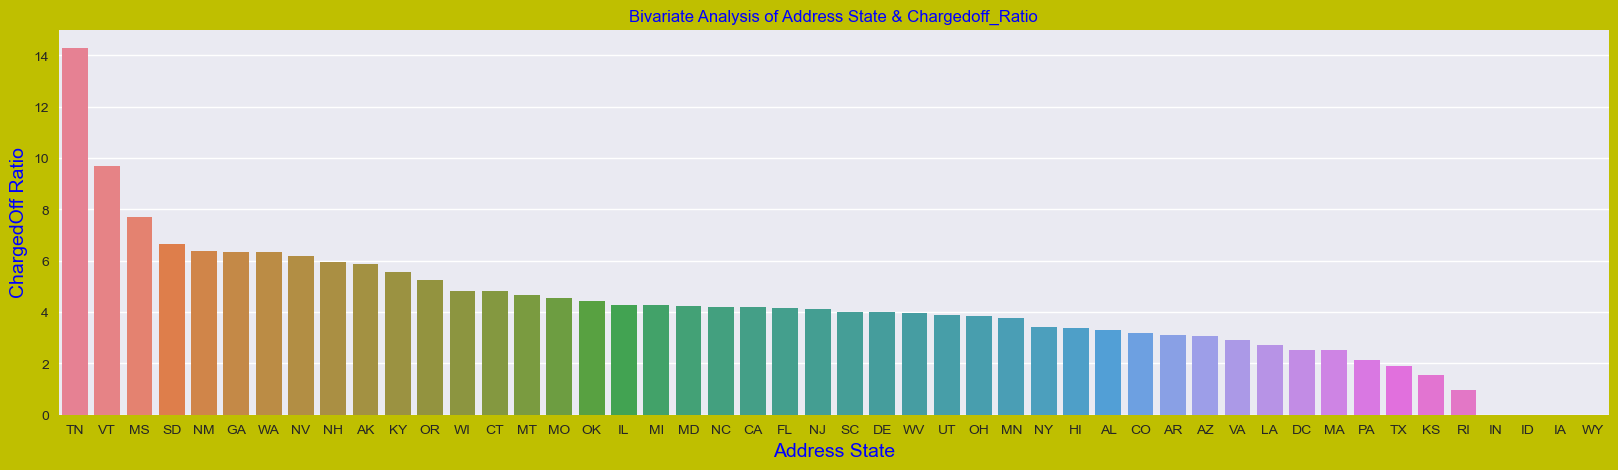

In [105]:
# Bivariate Analysis on Address state  against Chargedoff_Ratio -

# Code for plotting bar plot

plt.figure(figsize=(20,5),facecolor='y')
plt.title('Bivariate Analysis of Address State & Chargedoff_Ratio', fontsize=12,color='b')
sns.barplot(x='addr_state', y='Chargedoff_Ratio', data=addr_state_loan_status, hue = 'addr_state')
plt.xlabel('Address State',fontsize=14,color='b')
plt.ylabel('ChargedOff Ratio',fontsize=14,color = 'b')
plt.show()

***Observation :*** States ***"Tennessee (TN)", "Vermont (VT)", "Mississippi(MS)", "South Dakota"*** contributes to the maximum number of defaulters. Whereas States ***"Indiana(IN)", "Idaho(ID)", "Iowa(IA)", "Wyoming(WY)"*** doesnot have any defaulters. Seems to be a wide variation in in charged-off ratios across different states. There may be underlying economic, social, or regulatory factors in certain states that contribute to higher default rates.

### Step 7: Correlation Analysis & Observation using Heat Map

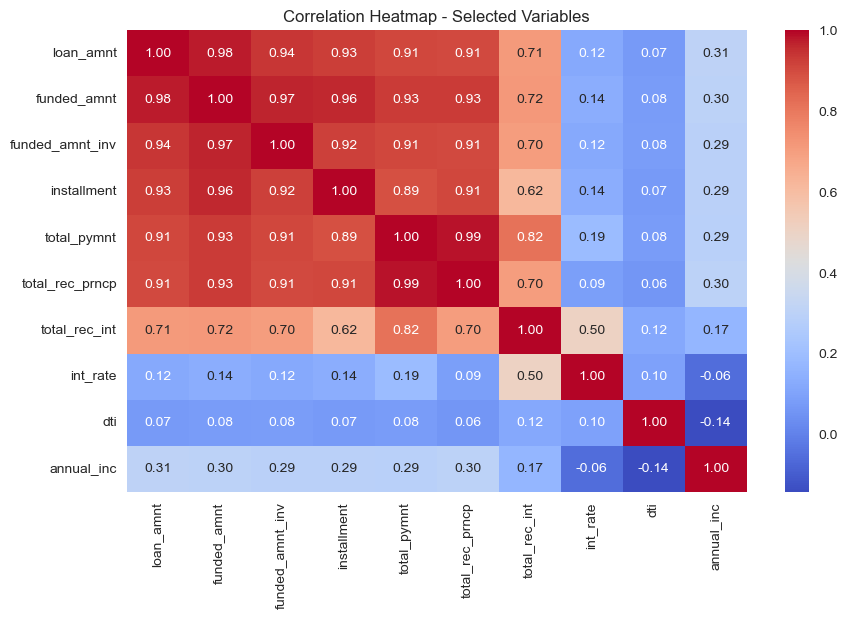

In [108]:
# Select Below columns for correlation
selected_columns = ['loan_amnt','funded_amnt', 'funded_amnt_inv','installment','total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                    'int_rate',  'dti', 'annual_inc']

correlation_data = loan[selected_columns]
corr_matrix = correlation_data.corr()

# Plot refined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap - Selected Variables")
plt.show()

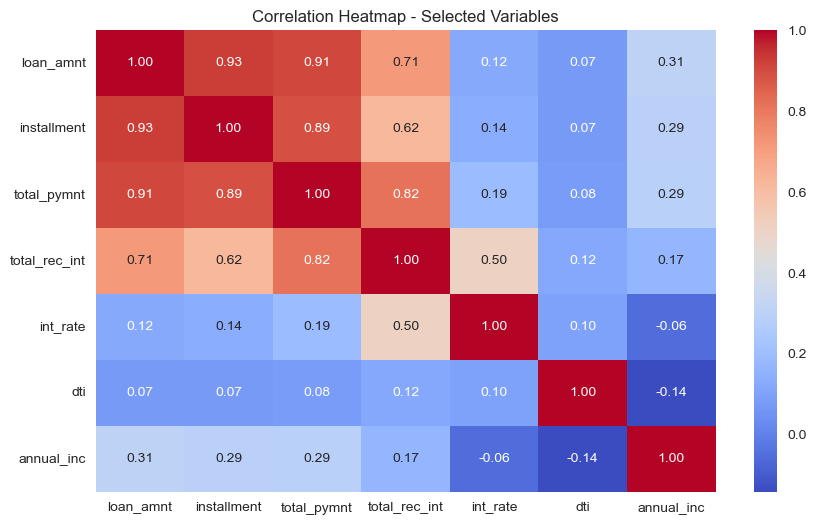

Strongly Correlated Pairs (Threshold > 0.7):
installment    loan_amnt        0.93
loan_amnt      installment      0.93
               total_pymnt      0.91
total_pymnt    loan_amnt        0.91
installment    total_pymnt      0.89
total_pymnt    installment      0.89
               total_rec_int    0.82
total_rec_int  total_pymnt      0.82
loan_amnt      total_rec_int    0.71
total_rec_int  loan_amnt        0.71
dtype: float64


In [109]:
# Above Heat Map shows some of the very strong co-relation, which means they are derived from each others, 
# and might not add any value to the EDA. So some of them can be dropped for cleaner inferences.

    # loan_amnt, funded_amnt, funded_amnt_inv are positively very strongly corelated. Dropping funded_amnt, funded_amnt_inv
    # total_pymnt & total_rec_prncp are positively very strongly corelated. Dropping total_rec_prncp

selected_columns = ['loan_amnt','installment','total_pymnt', 'total_rec_int', 'int_rate',  'dti', 'annual_inc']

correlation_data = loan[selected_columns]
corr_matrix = correlation_data.corr()

# Plot refined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap - Selected Variables")
plt.show()

corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
strong_pairs = round((corr_pairs[(corr_pairs > 0.7) & (corr_pairs < 1)]),2)
print("Strongly Correlated Pairs (Threshold > 0.7):")
print(strong_pairs)

***Strong Positive Correlations :***

 **loan_amnt and installment**: This is expected, as larger loans typically have higher monthly payments.
 **loan_amnt and total_pymnt**: Again, larger loans will generally have higher total payments made.
 **installment and total_pymnt**: Higher monthly payments contribute to larger total payments over time.

***Moderate Positive Correlations :*** 
    **loan_amnt** and **total_rec_int**: Larger loans often incur more interest charges.
    **installment** and **total_rec_int**: Higher monthly payments can lead to more interest being paid over time.
    
***Weak or No Correlation :*** **Interest rate, debt-to-income ratio, and annual income** have little to no impact on **loan amount, installment, and total payment**.
***Negative Correlation :*** **dti** and **annual_inc**: This suggests that as annual income increases, debt-to-income ratio tends to decrease.